In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('50_sin_nulos_Chicago_Illinois_UnitedStates.csv')
#Verificamos informacion del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8269 non-null   int64  
 1   host_name                    8269 non-null   object 
 2   host_since                   8269 non-null   object 
 3   host_location                8269 non-null   object 
 4   host_response_time           8269 non-null   object 
 5   host_response_rate           8269 non-null   object 
 6   host_acceptance_rate         8269 non-null   object 
 7   host_is_superhost            8269 non-null   object 
 8   host_neighbourhood           8269 non-null   object 
 9   host_total_listings_count    8269 non-null   int64  
 10  host_verifications           8269 non-null   object 
 11  host_has_profile_pic         8269 non-null   object 
 12  host_identity_verified       8269 non-null   object 
 13  neighbourhood     

In [3]:
#Corroboramos valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

id                             0
host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_neighbourhood             0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
has_availa

In [4]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = data.iloc[ : , [0, 9, 15, 16, 19, 20, 22, 23, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 49]]
cualitativas = data.iloc[ : , [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 21, 24, 25, 30, 38, 39, 47, 48]]

<Figure size 1500x800 with 0 Axes>

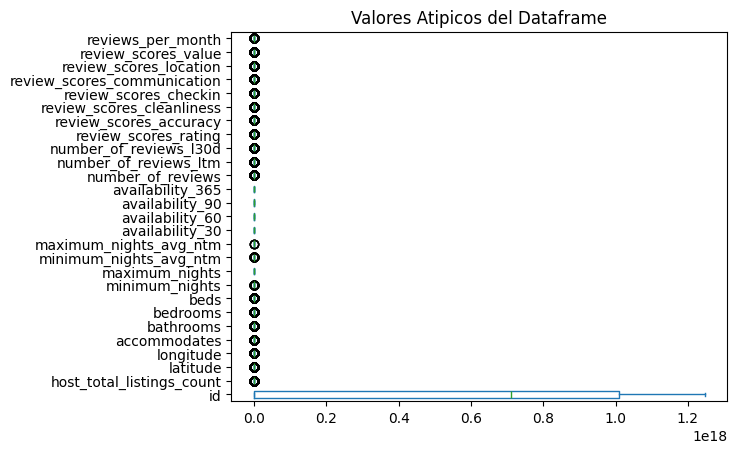

In [5]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize= (15, 8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show()  #Dibujamos el diagrama

**PROCEDIMIENTO "DESVIACION ESTANDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [6]:
#Metodo aplicando desviacion estandar. Encuentra los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                             2.017603e+18
host_total_listings_count      4.834798e+03
latitude                       4.207957e+01
longitude                     -8.753122e+01
accommodates                   1.374830e+01
bathrooms                      2.888174e+02
bedrooms                       1.775174e+02
beds                           3.065179e+02
minimum_nights                 9.046295e+01
maximum_nights                 1.765244e+03
minimum_nights_avg_ntm         9.233391e+01
maximum_nights_avg_ntm         6.834463e+07
availability_30                4.320839e+01
availability_60                9.176969e+01
availability_90                1.418137e+02
availability_365               5.701210e+02
number_of_reviews              3.181643e+02
number_of_reviews_ltm          7.487882e+01
number_of_reviews_l30d         7.929210e+00
review_scores_rating           5.833766e+00
review_scores_accuracy         6.021009e+00
review_scores_cleanliness      5.857756e+00
review

In [7]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data2 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data2

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2384,1.0,41.787900,-87.587800,1.0,1.0,1.0,1.0,3.0,89,...,19.0,1.0,4.99,4.98,4.99,4.99,4.98,4.95,4.94,2.08
1,7126,2.0,41.901660,-87.680210,2.0,1.0,1.0,1.0,2.0,60,...,36.0,1.0,4.71,4.85,4.57,4.91,4.87,4.90,4.75,2.94
2,10945,86.0,41.911960,-87.639810,4.0,1.0,2.0,2.0,4.0,120,...,30.0,4.0,4.70,4.83,4.81,4.84,4.87,4.98,4.72,0.82
3,12140,1.0,41.923570,-87.649470,3.0,1.0,1.0,1.0,2.0,10,...,1.0,0.0,4.94,4.69,5.00,5.00,5.00,5.00,4.81,0.14
4,28749,7.0,41.921370,-87.679330,6.0,2.0,3.0,3.0,2.0,30,...,38.0,6.0,4.80,4.86,4.75,4.93,4.86,4.92,4.71,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,1246505616545117832,3.0,41.791659,-87.667216,5.0,1.0,2.0,2.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8265,1246520637932735784,18.0,41.864443,-87.625259,8.0,2.0,2.0,4.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8266,1246620570694363906,2.0,41.971151,-87.674107,5.0,2.0,2.0,3.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8267,1246639379562163059,8.0,41.944385,-87.687886,4.0,1.0,2.0,2.0,3.0,28,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [8]:
#Corroboramos valores nulos
valores_nulos = data2.isnull().sum()
valores_nulos

id                               0
host_total_listings_count      193
latitude                        57
longitude                       75
accommodates                   236
bathrooms                      425
bedrooms                       163
beds                           477
minimum_nights                  46
maximum_nights                   0
minimum_nights_avg_ntm          55
maximum_nights_avg_ntm           4
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews              193
number_of_reviews_ltm           73
number_of_reviews_l30d          75
review_scores_rating           132
review_scores_accuracy         151
review_scores_cleanliness      135
review_scores_checkin          101
review_scores_communication    136
review_scores_location         150
review_scores_value            168
reviews_per_month               48
dtype: int64

In [9]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia dela dataframe
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(), 1))
data_clean

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2384,1.0,41.787900,-87.587800,1.0,1.0,1.0,1.0,3.0,89,...,19.0,1.0,4.99,4.98,4.99,4.99,4.98,4.95,4.94,2.08
1,7126,2.0,41.901660,-87.680210,2.0,1.0,1.0,1.0,2.0,60,...,36.0,1.0,4.71,4.85,4.57,4.91,4.87,4.90,4.75,2.94
2,10945,86.0,41.911960,-87.639810,4.0,1.0,2.0,2.0,4.0,120,...,30.0,4.0,4.70,4.83,4.81,4.84,4.87,4.98,4.72,0.82
3,12140,1.0,41.923570,-87.649470,3.0,1.0,1.0,1.0,2.0,10,...,1.0,0.0,4.94,4.69,5.00,5.00,5.00,5.00,4.81,0.14
4,28749,7.0,41.921370,-87.679330,6.0,2.0,3.0,3.0,2.0,30,...,38.0,6.0,4.80,4.86,4.75,4.93,4.86,4.92,4.71,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,1246505616545117832,3.0,41.791659,-87.667216,5.0,1.0,2.0,2.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8265,1246520637932735784,18.0,41.864443,-87.625259,8.0,2.0,2.0,4.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8266,1246620570694363906,2.0,41.971151,-87.674107,5.0,2.0,2.0,3.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8267,1246639379562163059,8.0,41.944385,-87.687886,4.0,1.0,2.0,2.0,3.0,28,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [10]:
#Corroboramos valores nulos
valores_nulos = data_clean.isnull().sum()
valores_nulos

id                             0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS DEL DATAFRAME**

In [11]:
#Metodo aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                             2.522038e+18
host_total_listings_count      6.950000e+01
latitude                       4.204370e+01
longitude                     -8.754855e+01
accommodates                   1.200000e+01
bathrooms                      3.500000e+00
bedrooms                       3.500000e+00
beds                           6.000000e+00
minimum_nights                 7.700000e+01
maximum_nights                 2.632500e+03
minimum_nights_avg_ntm         7.700000e+01
maximum_nights_avg_ntm         2.265000e+03
availability_30                4.650000e+01
availability_60                9.700000e+01
availability_90                1.395000e+02
availability_365               6.400000e+02
number_of_reviews              1.660000e+02
number_of_reviews_ltm          5.750000e+01
number_of_reviews_l30d         5.000000e+00
review_scores_rating           5.250000e+00
review_scores_accuracy         5.375000e+00
review_scores_cleanliness      5.275000e+00
review

In [12]:
#Obtenemos datos del dataframe
data2_iqr = cuantitativas[(y <= Limite_Superior_iqr) & (y>= Limite_Inferior_iqr)]
data2_iqr

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2384,1.0,41.787900,-87.587800,1.0,1.0,1.0,1.0,3.0,89,...,19.0,1.0,4.99,4.98,4.99,4.99,4.98,4.95,4.94,2.08
1,7126,2.0,41.901660,-87.680210,2.0,1.0,1.0,1.0,2.0,60,...,36.0,1.0,4.71,4.85,4.57,4.91,4.87,4.90,4.75,2.94
2,10945,NaN,41.911960,-87.639810,4.0,1.0,2.0,2.0,4.0,120,...,30.0,4.0,4.70,4.83,4.81,4.84,4.87,4.98,4.72,0.82
3,12140,1.0,41.923570,-87.649470,3.0,1.0,1.0,1.0,2.0,10,...,1.0,0.0,4.94,4.69,5.00,5.00,5.00,5.00,4.81,0.14
4,28749,7.0,41.921370,-87.679330,6.0,2.0,3.0,3.0,2.0,30,...,38.0,NaN,4.80,4.86,4.75,4.93,4.86,4.92,4.71,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,1246505616545117832,3.0,41.791659,-87.667216,5.0,1.0,2.0,2.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8265,1246520637932735784,18.0,41.864443,-87.625259,8.0,2.0,2.0,4.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8266,1246620570694363906,2.0,41.971151,-87.674107,5.0,2.0,2.0,3.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8267,1246639379562163059,8.0,41.944385,-87.687886,4.0,1.0,2.0,2.0,3.0,28,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [13]:
#Corroboramos valores nulos
valores_nulos = data2_iqr.isnull().sum()
valores_nulos

id                                0
host_total_listings_count      1246
latitude                        263
longitude                       253
accommodates                    245
bathrooms                       579
bedrooms                        850
beds                            754
minimum_nights                   61
maximum_nights                    0
minimum_nights_avg_ntm           71
maximum_nights_avg_ntm            4
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews               697
number_of_reviews_ltm           221
number_of_reviews_l30d          301
review_scores_rating            638
review_scores_accuracy          614
review_scores_cleanliness       678
review_scores_checkin           457
review_scores_communication     801
review_scores_location          784
review_scores_value             757
reviews_per_month               122
dtype: int64

In [14]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data3_iqr = data2_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data2_iqr.mean(), 1))
data3_iqr 

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2384,1.0,41.787900,-87.587800,1.0,1.0,1.0,1.0,3.0,89,...,19.0,1.0,4.99,4.98,4.99,4.99,4.98,4.95,4.94,2.08
1,7126,2.0,41.901660,-87.680210,2.0,1.0,1.0,1.0,2.0,60,...,36.0,1.0,4.71,4.85,4.57,4.91,4.87,4.90,4.75,2.94
2,10945,11.1,41.911960,-87.639810,4.0,1.0,2.0,2.0,4.0,120,...,30.0,4.0,4.70,4.83,4.81,4.84,4.87,4.98,4.72,0.82
3,12140,1.0,41.923570,-87.649470,3.0,1.0,1.0,1.0,2.0,10,...,1.0,0.0,4.94,4.69,5.00,5.00,5.00,5.00,4.81,0.14
4,28749,7.0,41.921370,-87.679330,6.0,2.0,3.0,3.0,2.0,30,...,38.0,1.2,4.80,4.86,4.75,4.93,4.86,4.92,4.71,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,1246505616545117832,3.0,41.791659,-87.667216,5.0,1.0,2.0,2.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8265,1246520637932735784,18.0,41.864443,-87.625259,8.0,2.0,2.0,4.0,1.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8266,1246620570694363906,2.0,41.971151,-87.674107,5.0,2.0,2.0,3.0,32.0,365,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8267,1246639379562163059,8.0,41.944385,-87.687886,4.0,1.0,2.0,2.0,3.0,28,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [15]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data3_iqr], axis = 1)
Datos_limpios

,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Rebecca,2008-08-29,No location,within an hour,100%,88%,t,Hyde Park,"['email', 'phone']",t,...,19.0,1.0,4.99,4.98,4.99,4.99,4.98,4.95,4.94,2.08
1,Sarah,2009-05-19,"Chicago, IL",within an hour,100%,100%,t,Ukrainian Village,"['email', 'phone']",t,...,36.0,1.0,4.71,4.85,4.57,4.91,4.87,4.90,4.75,2.94
2,At Home Inn,2009-08-21,"Chicago, IL",within an hour,94%,95%,t,Old Town,"['email', 'phone', 'work_email']",t,...,30.0,4.0,4.70,4.83,4.81,4.84,4.87,4.98,4.72,0.82
3,Shay And Robert,2009-10-18,"Chicago, IL",within an hour,100%,75%,f,Lincoln Park,"['email', 'phone']",t,...,1.0,0.0,4.94,4.69,5.00,5.00,5.00,5.00,4.81,0.14
4,Lauri,2009-07-25,Italy,within a few hours,100%,88%,t,Bucktown,"['email', 'phone']",t,...,38.0,1.2,4.80,4.86,4.75,4.93,4.86,4.92,4.71,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,Valora Kendra,2016-10-26,"Cashton, WI",within an hour,100%,100%,t,West Englewood,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8265,Patricia,2016-03-07,"Chicago, IL",within an hour,100%,99%,t,Rush & Division,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8266,Vladimir,2017-06-19,"Chicago, IL",within a few hours,100%,86%,t,Ravenswood,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00
8267,Eva,2015-12-19,"Chicago, IL",within an hour,100%,98%,t,Albany Park,"['email', 'phone']",t,...,0.0,0.0,4.80,5.00,4.90,4.80,5.00,4.90,4.80,1.00


In [16]:
#Corroboramos valores nulos
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_neighbourhood             0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
price                          0
has_availability               0
first_review                   0
last_review                    0
license                        0
instant_bookable               0
id                             0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds      

In [17]:
#Exportamos datos limpios a csv
Datos_limpios.to_csv("50_sin_nulos_ni_atipicos_Chicago_Illinois_UnitedStates.csv")